In [6]:
import sys
sys.path.append("../")
import requests
import json
import tweepy as tw
import src.data_in as dt_in
import pandas as pd
import src.data_prep as prep
from setup import token
import datetime
import pickle

In [7]:
date = datetime.date.today()

In [12]:
out_df = pd.read_feather(f"./../cache/data_transformed_{str(date)}")

filehandler = open(f"./../cache/tokens_list_{str(date)}.pkl", 'rb') 
tokens_list = pickle.load(filehandler)

EOFError: Ran out of input

In [83]:


# Generate the word cloud from frequencies
wc = WordCloud().generate_from_text(flat_series)

plt.imshow(wc)
plt.axis('off')
plt.show()

TypeError: expected string or bytes-like object

In [84]:
# Generate the word cloud from frequencies
wc = WordCloud().generate_from_text(flat_series.values)

plt.imshow(wc)
plt.axis('off')
plt.show()

TypeError: cannot use a string pattern on a bytes-like object

In [90]:
filler_words = [
    "the", "to", "of", "have", "in", "a", "is", 
    "and", "for", "as"]

flat_series = flat_series.str.replace("“", "")
flat_series = flat_series.str.replace("”", "")
flat_series = flat_series.str.replace(",", "")
flat_series = flat_series.str.replace("’s", "")

flat_series = flat_series[
    ~(flat_series.isin(filler_words))]

flat_series = flat_series[
    ~(flat_series.str.contains("http"))]

value_counts = (
    flat_series
    .value_counts()
    .reset_index()
    .rename(columns={"index": "word", 0: "count"})
    .sort_values("count", ascending=False)
)

In [91]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

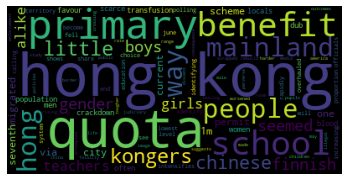

In [92]:
# Generate the word cloud from frequencies
wc = WordCloud().generate_from_text(" ".join(flat_series.values.astype(str)))

plt.imshow(wc)
plt.axis('off')
plt.show()